In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('kaggle_train.csv')
print(len(df))   #  number of lines
#print(df)

X=df.loc[:,["percent_atom_al","percent_atom_ga","percent_atom_in","formation_energy_ev_natom"]]
y=df["bandgap_energy_ev"]
print(y)  # column of the band gap energies 
print(X)    # four columns 

2400
0       3.4387
1       2.9210
2       2.7438
3       3.3492
4       1.3793
         ...  
2395    3.7349
2396    3.4915
2397    3.2750
2398    1.3915
2399    4.2107
Name: bandgap_energy_ev, Length: 2400, dtype: float64
      percent_atom_al  percent_atom_ga  percent_atom_in  \
0              0.6250           0.3750           0.0000   
1              0.6250           0.3750           0.0000   
2              0.8125           0.1875           0.0000   
3              0.7500           0.0000           0.2500   
4              0.0000           0.6250           0.3750   
...               ...              ...              ...   
2395           0.7500           0.2500           0.0000   
2396           0.4167           0.5833           0.0000   
2397           0.4375           0.5625           0.0000   
2398           0.3125           0.1875           0.5000   
2399           0.8750           0.0938           0.0312   

      formation_energy_ev_natom  
0                        0.0680  

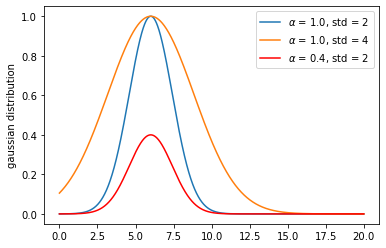

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# define Gaussian distribution function 'guass' plot for 3 values of params

alpha = 1; mean = 6; std = 2; variance = np.square(std)
Xn = np.arange(0,20,.01)

def guass(alpha, x, mean, std, variance):
    return alpha*np.exp(-((x-mean)**2)/variance)

e = [ guass(alpha, x, mean, std, variance) for x in Xn]  ## ??? what is x in 'for x in X'

plt.plot(Xn,e, label=r'$\alpha$ = 1.0, std = 2')

alpha = 1; mean = 6; std = 4; variance = np.square(std)
e = [ guass(alpha, x, mean, std, variance) for x in Xn]
plt.plot(Xn,e, label=r'$\alpha$ = 1.0, std = 4')

alpha = 0.4; mean = 6; std = 2; variance = np.square(std)
e = [ guass(alpha, x, mean, std, variance) for x in Xn]

plt.plot(Xn,e, c='r', label=r'$\alpha$ = 0.4, std = 2')
plt.legend()
plt.ylabel('gaussian distribution')
plt.show()


In [3]:
#pip install --upgrade scikit-learn
print(Xn)
len(Xn)

[0.000e+00 1.000e-02 2.000e-02 ... 1.997e+01 1.998e+01 1.999e+01]


2000

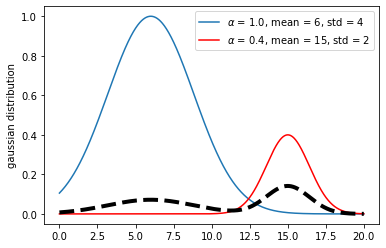

In [4]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1; mean = 6; std = 4; variance = np.square(std)
e1 = [ guass(alpha, x, mean, std, variance) for x in Xn]
plt.plot(Xn,e1, label=r'$\alpha$ = 1.0, mean = 6, std = 4')

alpha = 0.4; mean = 15; std = 2; variance = np.square(std)
e2 = [ guass(alpha, x, mean, std, variance) for x in Xn]
plt.plot(Xn,e2, c='r', label=r'$\alpha$ = 0.4, mean = 15, std = 2')
plt.legend()
plt.ylabel('gaussian distribution')


gmm_y_sum = np.full_like(Xn, fill_value=0, dtype=np.float32)

w1= 0.5
gmm_y_sum += e1 / np.trapz(e1, Xn) * w1   ## which column are we summing here? 

w2= 0.5
gmm_y_sum += e2 / np.trapz(e2, Xn) * w2

plt.plot(Xn,gmm_y_sum, color="black", lw=4, label="Gauss_sum", linestyle="dashed")

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train model using sklearn package

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)


[-64.94888833 -67.29178801 -68.34303069  -4.49330987]
69.62987572346131


In [7]:
y_prediction=reg.predict(X_test)

In [8]:
total_error = 0
error = []
for i, j in zip(y_prediction, y_test):
        total_error += np.abs(i-j) 
        error.append(np.abs(i-j))

print(len(error))
np.sum(error)/len(error)
total_error / len(y_prediction)


792


0.28509761411818235

### Check prediction on rest of the 20% data

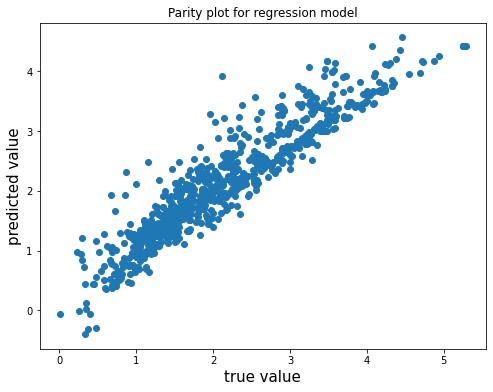

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model')
plt.show()

### Lasso

In [10]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
print(clf.coef_)
y_prediction_lasso=clf.predict(X_test)

[ 0.7327184   0.         -0.99238607 -0.        ]


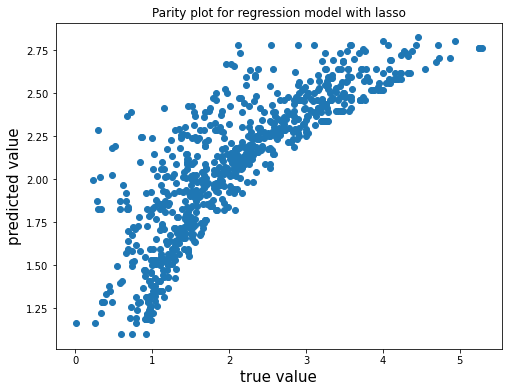

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction_lasso)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model with lasso')
plt.show()

### [Kernel Ridge Regression (KRR)](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

In [12]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)

y_prediction_krr=krr.predict(X_test)


### [KRR with rbf (radial basis function) kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html)

## $k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$

In [13]:
from sklearn.metrics import mean_absolute_error
krr = KernelRidge(kernel='rbf',alpha=0.2)
krr.fit(X_train, y_train)

y_prediction_krr_rbf=krr.predict(X_test)

print("with krr rbf kernel, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_rbf)))

with krr rbf kernel, mae is: 0.2645787785847626


### [KRR with laplacian kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html)

## $k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$

### [KRR with periodic kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ExpSineSquared.html#sklearn.gaussian_process.kernels.ExpSineSquared)

## $k(x_i, x_j) = \text{exp}\left(-
\frac{ 2\sin^2(\pi d(x_i, x_j)/p) }{ l^ 2} \right)$

In [14]:
from sklearn.gaussian_process.kernels import ExpSineSquared
kernel = ExpSineSquared(length_scale=1, periodicity=1)
krr = KernelRidge(kernel=kernel)
krr.fit(X_train, y_train)

y_prediction_krr_exp=krr.predict(X_test)

print("with krr periodic kernel, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_exp)))

C:\Users\GARASHCH\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


with krr periodic kernel, mae is: 0.5170851303005353


In [15]:

krr = KernelRidge(kernel='polynomial',alpha=0.2)
krr.fit(X_train, y_train)

y_prediction_krr_poly=krr.predict(X_test)

print("with krr polynomial kernel, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_poly)))


with krr polynomial kernel, mae is: 0.26387073287435125


In [16]:
krr = KernelRidge(kernel='laplacian',alpha=0.2)
krr.fit(X_train, y_train)

y_prediction_krr_lapla=krr.predict(X_test)

print("with krr laplacian kernel, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_lapla)))


with krr laplacian kernel, mae is: 0.20963069234557968


### Final plot

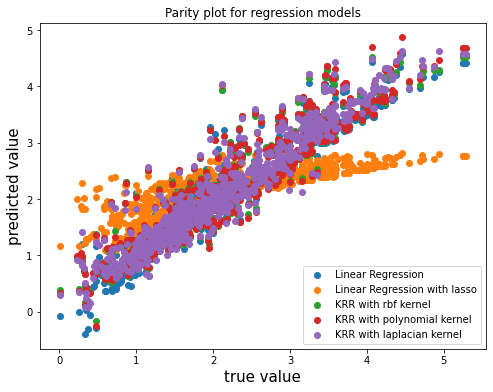

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction,label='Linear Regression')
plt.scatter(y_test,y_prediction_lasso,label='Linear Regression with lasso')
plt.scatter(y_test,y_prediction_krr_rbf,label='KRR with rbf kernel')
plt.scatter(y_test,y_prediction_krr_poly,label='KRR with polynomial kernel')
plt.scatter(y_test,y_prediction_krr_lapla,label='KRR with laplacian kernel')
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression models')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error
print("with linear regression, mae is: {}".format(mean_absolute_error(y_test,y_prediction)))
print("without lasso, mae is: {}".format(mean_absolute_error(y_test,y_prediction)))
print("with lasso, mae is: {}".format(mean_absolute_error(y_test,y_prediction_lasso)))
print("with krr, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr)))
print("with krr rbf, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_rbf)))
print("with krr periodic, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_exp)))
print("with krr polynomial, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_poly)))
print("with krr laplacian, mae is: {}".format(mean_absolute_error(y_test,y_prediction_krr_lapla)))

with linear regression, mae is: 0.2850976141181823
without lasso, mae is: 0.2850976141181823
with lasso, mae is: 0.5652949306422843
with krr, mae is: 0.2816259584152896
with krr rbf, mae is: 0.2645787785847626
with krr periodic, mae is: 0.5170851303005353
with krr polynomial, mae is: 0.26387073287435125
with krr laplacian, mae is: 0.20963069234557968
